In [4]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("archive/marathon_results_2016.csv")

# Display the first few rows of the dataset
df.head()


,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,5,"Hayle, Lemi Berhanu",21,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:04,2:12:45,2:12:45,1,1,1
1,1,"Desisa, Lelisa",26,M,Ambo,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:06,2:13:32,2:13:32,2,2,2
2,6,"Tsegay, Yemane Adhane",31,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:46,...,1:19:15,1:34:45,1:50:48,2:06:47,0:05:07,2:14:02,2:14:02,3,3,3
3,11,"Korir, Wesley",33,M,Kitale,NaN,KEN,NaN,NaN,0:15:46,...,1:19:16,1:34:45,1:50:48,2:06:47,0:05:07,2:14:05,2:14:05,4,4,4
4,14,"Lonyangata, Paul",23,M,Eldoret,NaN,KEN,NaN,NaN,0:15:46,...,1:19:18,1:34:46,1:51:30,2:08:11,0:05:11,2:15:45,2:15:45,5,5,5


In [12]:
df['Proj Time'].value_counts()

Proj Time
-           109
3:27:48      14
3:28:49      14
3:54:42      14
3:36:17      14
           ... 
4:29:55       1
4:30:01       1
4:30:02       1
4:30:03       1
10:42:16      1
Name: count, Length: 8891, dtype: int64

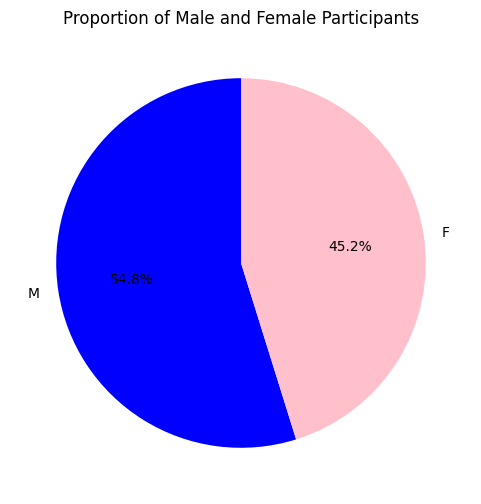

In [2]:
import matplotlib.pyplot as plt

# Count the number of male and female participants
gender_counts = df["M/F"].value_counts()

# Plot the proportions
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'pink'], startangle=90)
plt.title("Proportion of Male and Female Participants")
plt.show()


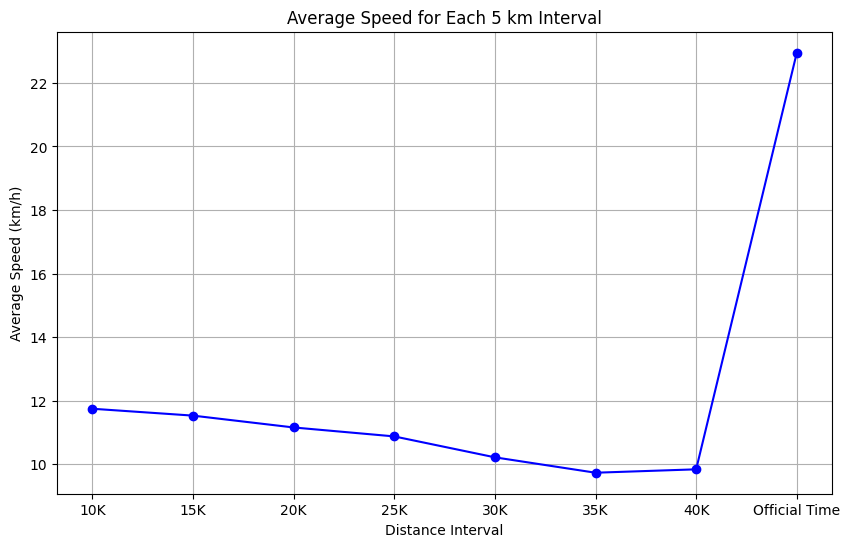

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert time strings to seconds
def time_to_seconds(time_str):
    if pd.isnull(time_str) or time_str == '-':
        return None
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Load the marathon data
file_path = 'archive/marathon_results_2016.csv'  # Replace with your file path
marathon_data = pd.read_csv(file_path)

# Extract 5 km interval columns and convert them to seconds
intervals = ['5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K', 'Official Time']
interval_times = [marathon_data[interval].apply(time_to_seconds) for interval in intervals]

# Calculate the average speed (km/h) for each interval
speeds = []
for i in range(1, len(intervals)):
    distance = 5  # Each interval represents 5 km
    time_diff = (interval_times[i] - interval_times[i - 1]).dropna()  # Time difference in seconds
    speed = (distance / time_diff.mean()) * 3600  # Convert to km/h
    speeds.append(speed)

# Plotting the average speed for each 5 km interval
plt.figure(figsize=(10, 6))
plt.plot(intervals[1:], speeds, marker='o', linestyle='-', color='blue')
plt.title('Average Speed for Each 5 km Interval')
plt.xlabel('Distance Interval')
plt.ylabel('Average Speed (km/h)')
plt.grid(True)
plt.show()


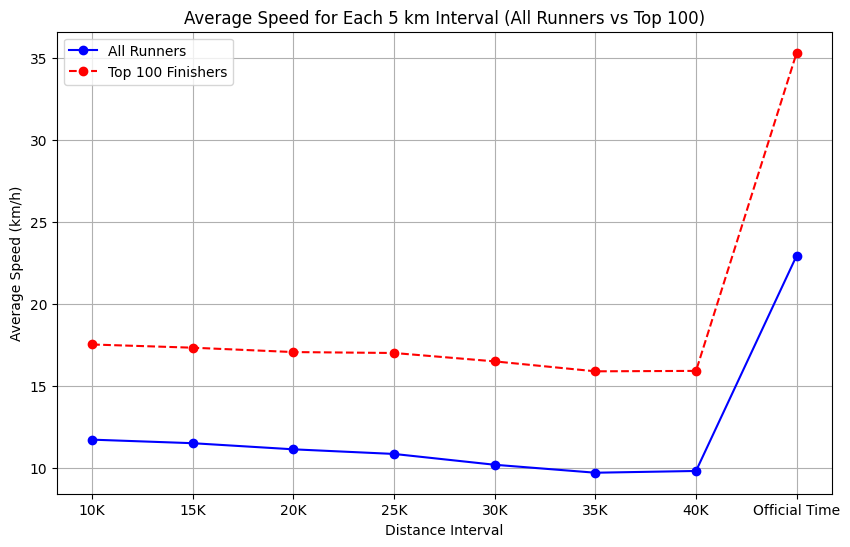

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert time strings to seconds
def time_to_seconds(time_str):
    if pd.isnull(time_str) or time_str == '-':
        return None
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Load the marathon data
file_path = 'archive/marathon_results_2016.csv'  # Replace with your file path
marathon_data = pd.read_csv(file_path)

# Convert the 'Official Time' column to seconds for sorting
marathon_data['Official Time (s)'] = marathon_data['Official Time'].apply(time_to_seconds)

# Extract 5 km interval columns and convert them to seconds
intervals = ['5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K', 'Official Time']
interval_times = [marathon_data[interval].apply(time_to_seconds) for interval in intervals]

# Calculate the average speed (km/h) for each interval for all runners
speeds = []
for i in range(1, len(intervals)):
    distance = 5  # Each interval represents 5 km
    time_diff = (interval_times[i] - interval_times[i - 1]).dropna()  # Time difference in seconds
    speed = (distance / time_diff.mean()) * 3600  # Convert to km/h
    speeds.append(speed)

# Filter the top 100 finishers based on the 'Official Time (s)' column
top_100 = marathon_data.nsmallest(100, 'Official Time (s)')

# Re-calculate interval times for the top 100 finishers
top_100_interval_times = [top_100[interval].apply(time_to_seconds) for interval in intervals]

# Calculate the average speed (km/h) for each interval for the top 100 finishers
top_100_speeds = []
for i in range(1, len(intervals)):
    distance = 5  # Each interval represents 5 km
    time_diff = (top_100_interval_times[i] - top_100_interval_times[i - 1]).dropna()  # Time difference in seconds
    speed = (distance / time_diff.mean()) * 3600  # Convert to km/h
    top_100_speeds.append(speed)

# Plotting the average speed for each 5 km interval for both all runners and top 100 finishers
plt.figure(figsize=(10, 6))

# Plotting all runners
plt.plot(intervals[1:], speeds, marker='o', linestyle='-', color='blue', label='All Runners')

# Plotting top 100 finishers
plt.plot(intervals[1:], top_100_speeds, marker='o', linestyle='--', color='red', label='Top 100 Finishers')

# Adding titles and labels
plt.title('Average Speed for Each 5 km Interval (All Runners vs Top 100)')
plt.xlabel('Distance Interval')
plt.ylabel('Average Speed (km/h)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
